In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/car_age_price.csv')

In [31]:
df.shape

(112, 2)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [33]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


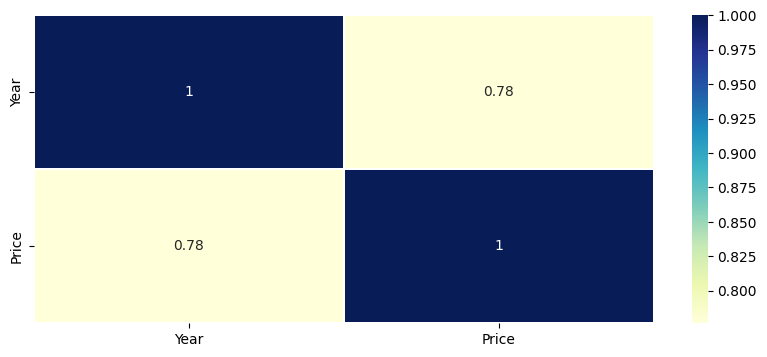

In [10]:
corr_matrix = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,linewidths=0.2, annot=True,cmap = 'YlGnBu')
plt.show()

In [11]:
y = df['Price']
x = df.drop('Price',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [22]:
model = lr.fit(x_train,y_train)

In [23]:
x_train

,Year
81,2014
77,2015
15,2017
30,2019
45,2018
...,...
106,2015
14,2017
92,2017
51,2018


In [24]:
y_train

,Price
81,390000
77,325000
15,500000
30,650000
45,450000
...,...
106,300000
14,475000
92,520000
51,550000


In [25]:
pred = model.predict(x_test)
pred

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [26]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [27]:
y_test

,Price
40,525000
65,495000
4,465000
47,450000
42,550000
69,300000
26,550000
11,500000
10,500000
44,550000


In [28]:
### Mean squired error - to check how is our model performing

In [29]:
from sklearn.metrics import mean_squared_error
print('MSE is: \n',mean_squared_error(y_test,pred))

MSE is: 
 3878767151.073449


In [30]:
from sklearn.metrics import r2_score
print('R squired value is \n',r2_score(y_test,pred))

R squired value is 
 0.4347961632108023


In [ ]:
### Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()


In [37]:
logit_model.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred = logit_model.predict(x_test)

In [39]:
y_pred

array([550000, 550000, 550000, 550000, 550000, 550000, 550000, 550000,
       550000, 550000, 550000, 550000, 550000, 550000, 550000, 550000,
       550000, 550000, 550000, 550000, 550000, 550000, 550000, 550000,
       550000, 550000, 550000, 550000])

In [40]:
y_test

,Price
40,525000
65,495000
4,465000
47,450000
42,550000
69,300000
26,550000
11,500000
10,500000
44,550000


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy is :',accuracy_score(y_test,y_pred))



Accuracy is : 0.21428571428571427


In [52]:
new_predict = logit_model.predict([[2022]])

In [55]:
print('2022 year seconed hand car price is : \n', new_predict)

2022 year seconed hand car price is : 
 [550000]


In [56]:
#### Lasso regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:

alpha = 0.1  # adjust basedon performance
lass_model = Lasso(alpha=alpha)
lass_model.fit(x_train,y_train)
y_pred = lass_model.predict(x_test)

In [ ]:
## Evaluate the model

In [60]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f"Model Coefficients: {lass_model.coef_}")
print(f"Intercept: {lass_model.intercept_}")

Mean Squared Error: 3878764025.5442586
R-squared: 0.43479661865476726
Model Coefficients: [46978.97552475]
Intercept: -94251328.60790946


In [61]:
### Visualization Results

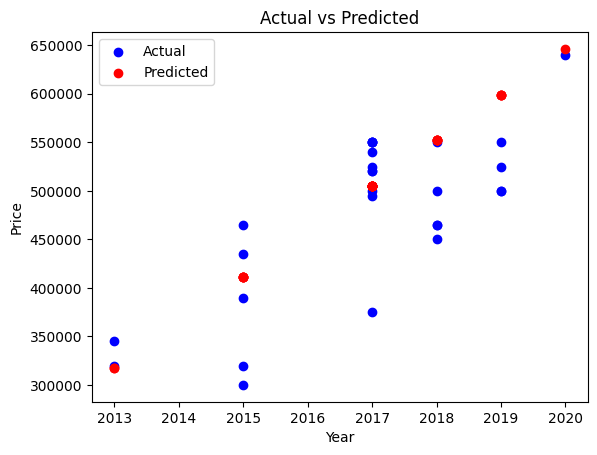

In [62]:
plt.scatter(x_test,y_test,color='blue',label='Actual')
plt.scatter(x_test,y_pred,color='red',label='Predicted')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()